In [12]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = datasets.load_dataset('JetBrains-Research/template-generation', 'java', split='dev', cache_dir=None)

In [6]:
df

Dataset({
    features: ['id', 'full_name', 'owner', 'name', 'html_url', 'is_template', 'description', 'template_keywords', 'license', 'topics', 'size', 'metrics', 'languages', 'language', 'created_at', 'updated_at', 'code_lines', 'gpt_description'],
    num_rows: 290
})

In [4]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Maria.Tigina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Maria.Tigina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

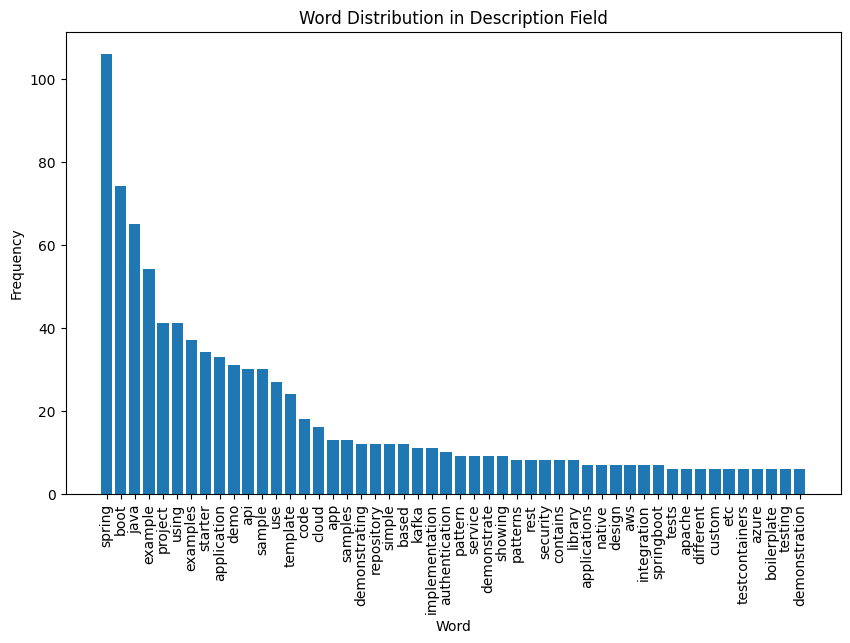

In [13]:
translator = str.maketrans('', '', string.punctuation)
descriptions = " ".join(map(lambda d: str(d), df['description']))
descriptions = descriptions.translate(translator)

tokens = word_tokenize(descriptions)
tokens = [word.lower() for word in tokens]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]
# stemmer = PorterStemmer()
# tokens = [stemmer.stem(word) for word in tokens]

word_counts = Counter(tokens)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_counts_df.index[:50], word_counts_df[0][:50])
plt.title('Word Distribution in Description Field')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')

plt.show()

In [14]:
topics = ['aws', 'spring', 'kafka', 'apache', 'azure']